In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string

In [2]:
'''
    Matrix dari bentuk 2 dimensi adalaha (x, y, w) dengan w = 1, dikarenakan menggunakan homogeneus coordinates
    
    berikut pendefisisan bangun persegi empat dalam bentuk matrix
'''
A = np.array([
    [0, 0, 1],
    [0, 2, 1],
    [2, 2, 1],
    [2, 0, 1]
])

In [3]:
A

array([[0, 0, 1],
       [0, 2, 1],
       [2, 2, 1],
       [2, 0, 1]])

In [4]:
'''
    Fungsi untuk meplot gambar
'''

def plot_2D(matrix, title = "Plot gambar 2 Dimensi"):
    '''
        matrix = matrix input yang akan di plot
    '''
    name = list(string.ascii_uppercase)
    i = 0
    sx = []
    sy = []
    for row in matrix:
        x, y, w = row
        sx.append(x)
        sy.append(y)
        plt.scatter(x, y)
        plt.annotate(name[i], (x+0.15, y+0.15))
        i += 1

    sx.append(matrix[0][0])
    sy.append(matrix[0][1])

    plt.plot(sx, sy)
    plt.gca().set_xticks(np.arange(-3, 6, 1))
    plt.gca().set_yticks(np.arange(-3, 6, 1))
    plt.grid()
    plt.title(title)
    plt.show()

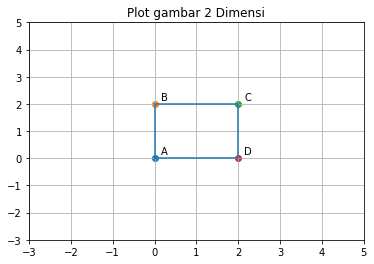

In [5]:
plot_2D(A)

In [19]:
'''
    Fungsi - fungsi transformasi 2 dimensi
'''

def twodimension_translation(matrix, t1, t2):
    '''
        matrix = matrix input yang akan di transformasi
        t1 = besar pergeseran pada sumbu x
        t2 = besar pergeseran pada sumbu y
    '''
#     matrix translasi
    m_translasi = np.array([
        [1, 0, t1],
        [0, 1, t2],
        [0, 0, 1]
    ])
    
    '''
    men-transpose matrix input agar menjadi [[x1, x2, ...],
                                            [y1, y2, ...],
                                            [w1, w2, ...]]
    '''

    m_t = matrix.transpose()
    result = (m_translasi @ m_t)
    
#     men-transpose kan kembali agar menjadi seperti format matrix input
    result = result.transpose()
    return np.array(result)

def twodimension_rotation(matrix, degree):
    '''
        matrix = matrix input yang akan di transformasi
        degree = besar derajat rotasi yang dinginkan
    '''
    m_rotation = np.array([
        [np.cos(degree * np.pi/180), -np.sin(degree * np.pi/180), 0],
        [np.sin(degree * np.pi/180), np.cos(degree * np.pi/180), 0],
        [0, 0, 1]
    ])
    
    m_t = matrix.transpose()
    result = (m_rotation @ m_t)
    result = result.transpose()    
    return np.array(result)

def twodimension_translatingRotating(matrix, degree, tx=0, ty=0):
    '''
        matrix = matrix input yang akan di transformasi
        degree = besar derajat rotasi yang dinginkan
        tx = besar pergeseran pada sumbu x
        ty = besar pergeseran pada sumbu y
    '''
    m_rotation = np.array([
        [np.cos(degree * np.pi/180), -np.sin(degree * np.pi/180), tx],
        [np.sin(degree * np.pi/180), np.cos(degree * np.pi/180), ty],
        [0, 0, 1]
    ])
    
    m_t = matrix.transpose()
    result = (m_rotation @ m_t)
    result = result.transpose()    
    return np.array(result)

def twodimension_scaling(matrix, s):
    '''
        matrix = matrix input yang akan di transformasi
        s = besar skala
        
    '''
    m_scala = np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])
    
    m_t = matrix.transpose()
    result = (m_scala @ m_t)
    result = result.transpose()   
    return np.array(result)

def twodimension_affine(matrix, degree, s, t1, t2):
    '''
        matrix = matrix input yang akan di transformasi
        degree = besar derajat rotasi yang dinginkan
        s = besar skala
        tx = besar pergeseran pada sumbu x
        ty = besar pergeseran pada sumbu y
    '''
    m_affine = np.array([
        [s * np.cos(degree * np.pi/180), s * -np.sin(degree * np.pi/180), t1],
        [s * np.sin(degree * np.pi/180), s * np.cos(degree * np.pi/180), t2],
        [0, 0, 1]
    ])
    
    m_t = matrix.transpose()
    result = (m_affine @ m_t)
    result = result.transpose()    
    return np.array(result)

def twodimension_projection(matrix, v1, v2):
    m_projection = np.array([
        [1, 0, 0],
        [0, 1, 0],
        [v1, v2, 1]
    ])
    
    m_t = matrix.transpose()
    result = m_projection @ m_t
    result = result / result[2]
    result = result.transpose()    
    
    return np.array(result)

## Translasi

In [7]:
translasi_x = 2
translasi_y = 2
matrix_translasi = twodimension_translation(A, translasi_x, translasi_y)
print(matrix_translasi)

[[2 2 1]
 [2 4 1]
 [4 4 1]
 [4 2 1]]


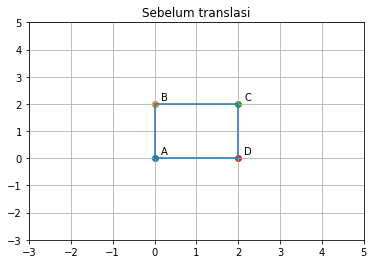

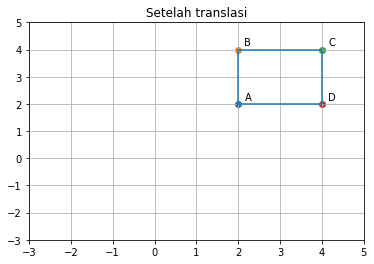

In [8]:
plot_2D(A, "Sebelum translasi")
plot_2D(matrix_translasi, "Setelah translasi")

## Rotasi

In [9]:
# totasi = perputaran gambar sebesar X derajat lawan arah jarum jam
rotasi = 90
matrix_rotasi = twodimension_rotation(A, rotasi)
matrix_rotasi

array([[ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00],
       [-2.0000000e+00,  1.2246468e-16,  1.0000000e+00],
       [-2.0000000e+00,  2.0000000e+00,  1.0000000e+00],
       [ 1.2246468e-16,  2.0000000e+00,  1.0000000e+00]])

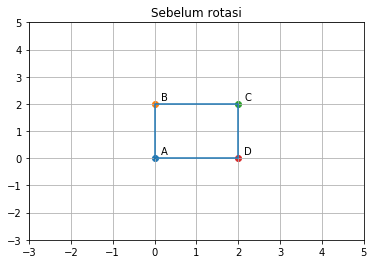

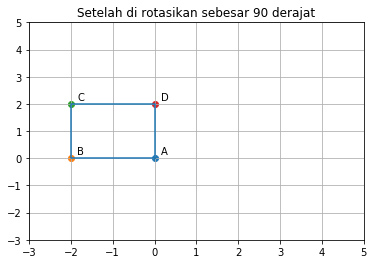

In [10]:
plot_2D(A, "Sebelum rotasi")
plot_2D(matrix_rotasi, "Setelah di rotasikan sebesar " + str(rotasi) + " derajat")

## Rotating + translation

In [11]:
# totasi = perputaran gambar sebesar X derajat lawan arah jarum jam
rotasi = 90
tx = 2
ty = 2
matrix_sr = twodimension_translatingRotating(A, rotasi, tx, ty)
matrix_sr

array([[2.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 4.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 1.00000000e+00]])

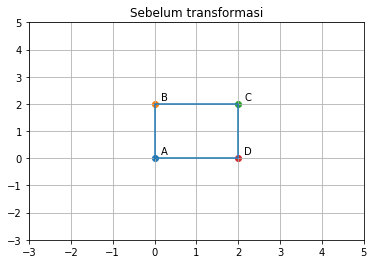

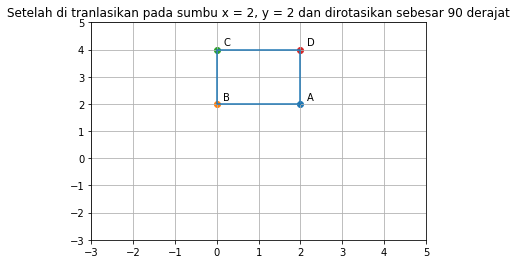

In [12]:
title = "Setelah di tranlasikan pada sumbu x = " + str(tx) + ", y = " + str(ty) + " dan dirotasikan sebesar " + str(rotasi) + " derajat"
plot_2D(A, "Sebelum transformasi")
plot_2D(matrix_sr, title)

## Dilatasi

In [13]:
s = 2
matrix_dilatasi = twodimension_scaling(A, s)
matrix_dilatasi

array([[0, 0, 1],
       [0, 4, 1],
       [4, 4, 1],
       [4, 0, 1]])

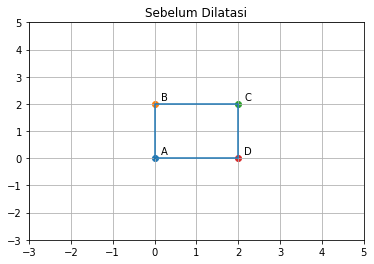

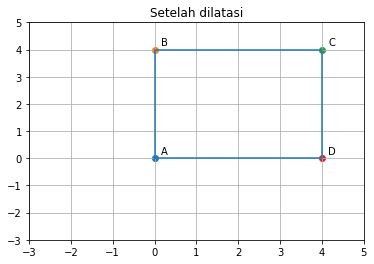

In [14]:
plot_2D(A, "Sebelum Dilatasi")
plot_2D(matrix_dilatasi, "Setelah dilatasi")

## Affine

In [20]:
rotasi = 45
tx = 3
ty = 2
scale = 2
matrix_affine = twodimension_affine(A, rotasi, scale, tx, ty)
matrix_affine

array([[3.        , 2.        , 1.        ],
       [0.17157288, 4.82842712, 1.        ],
       [3.        , 7.65685425, 1.        ],
       [5.82842712, 4.82842712, 1.        ]])

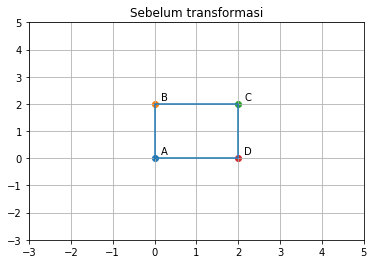

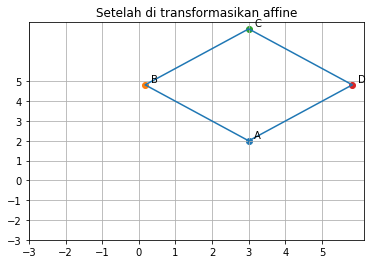

In [21]:
plot_2D(A, "Sebelum transformasi")
plot_2D(matrix_affine, "Setelah di transformasikan affine")

## Projection

In [17]:
v1 = 0.1
v2 = 0.025
matrix_projection = twodimension_projection(A, v1, v2)
matrix_projection

array([[0.        , 0.        , 1.        ],
       [0.        , 1.9047619 , 1.        ],
       [1.6       , 1.6       , 1.        ],
       [1.66666667, 0.        , 1.        ]])

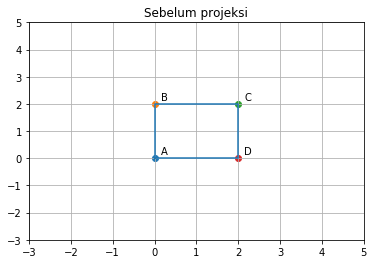

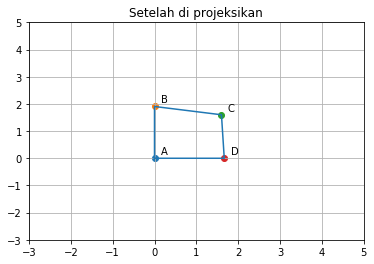

In [18]:
plot_2D(A, "Sebelum projeksi")
plot_2D(matrix_projection, "Setelah di projeksikan")